# Walmart Sales Forecasting  

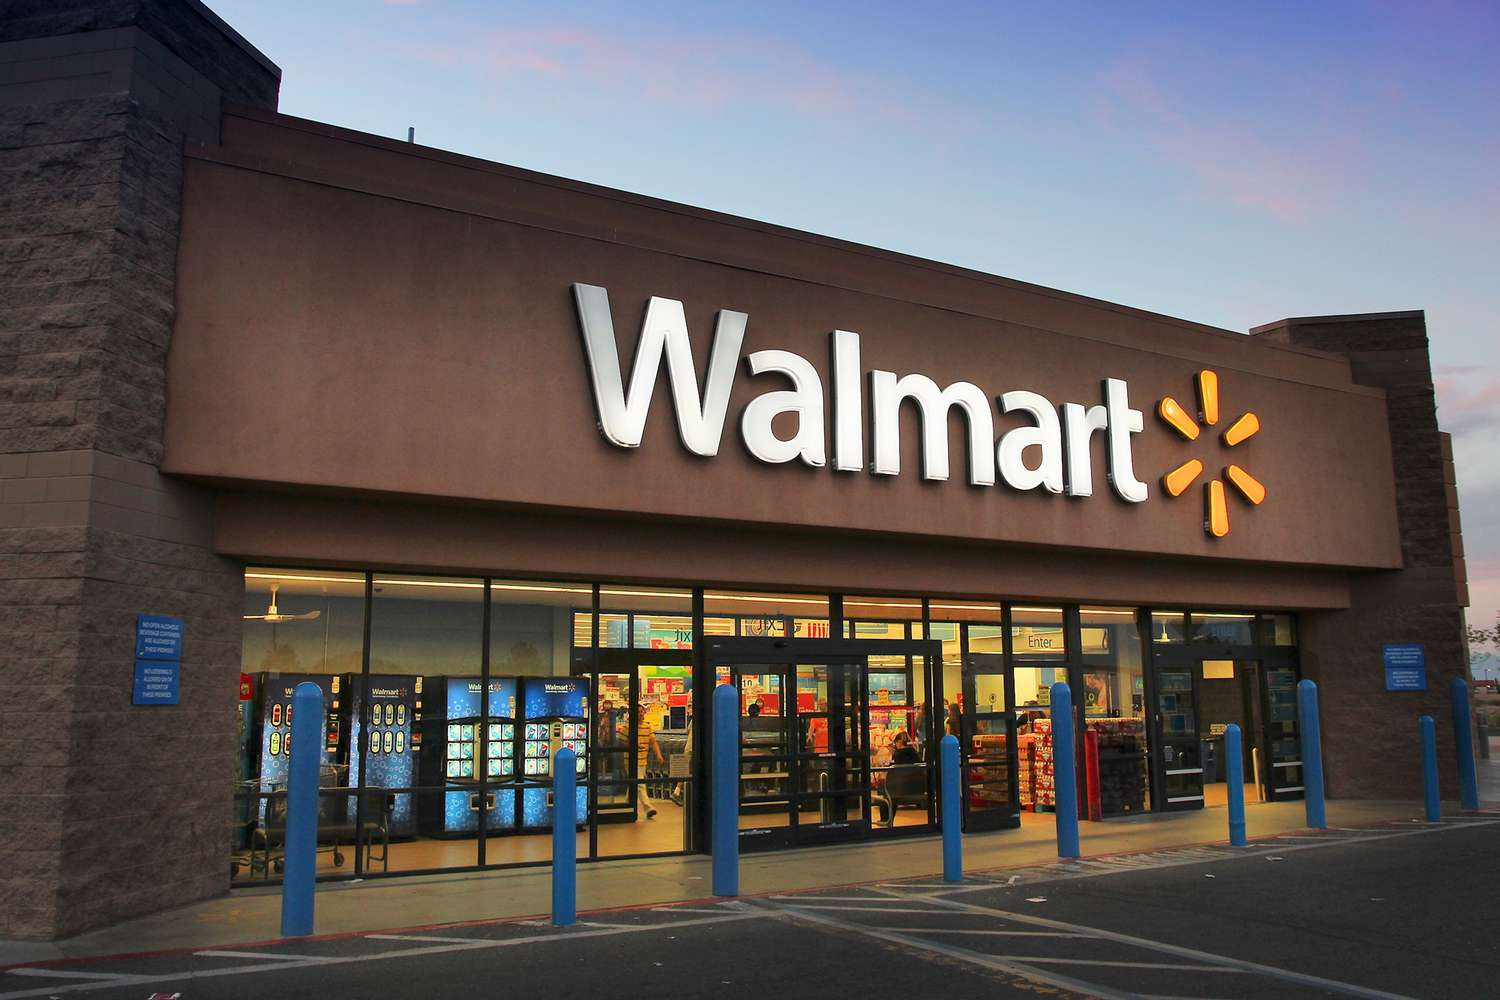

### Autor: [Andrew Joshua Flores Díaz]  
Proyecto académico – Predicción de ventas semanales usando ML  
Dataset: Walmart (Kaggle)


# **🧠 1. Introducción**

## Walmart Sales Forecasting
## Predicción de ventas semanales mediante modelos de Machine Learning

Este proyecto utiliza el dataset público de **Walmart (Kaggle)** para predecir las **ventas semanales** de distintas tiendas.
Se aplican técnicas de análisis exploratorio, ingeniería de características y modelos de regresión avanzada (Random Forest, XGBoost, LightGBM y CatBoost).

**Objetivo:** construir un modelo predictivo que maximice el coeficiente R² y minimice el RMSE, identificando tendencias y patrones útiles para la gestión de inventarios y toma de decisiones estratégicas.


> Añadir blockquote



# **⚙️ 2. Librerías y configuración inicial**




In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
!pip install catboost
from catboost import CatBoostRegressor

#**📊 3. Carga y descripción del dataset**

In [47]:
df = pd.read_csv("Walmart_Sales.csv")
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [48]:
df = df.rename(columns={
    "Date": "fecha",
    "Store": "Tienda",
    "Weekly_Sales": "Ventas_Semanales",
    "Holiday_Flag": "Día_feriado",
    "Temperature": "Temperatura",
    "Fuel_Price": "Precio_combustible",
    "CPI": "Índice_precio_consumidor",
    "Unemployment": "Desempleo"
})

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tienda                    6435 non-null   int64  
 1   fecha                     6435 non-null   object 
 2   Ventas_Semanales          6435 non-null   float64
 3   Día_feriado               6435 non-null   int64  
 4   Temperatura               6435 non-null   float64
 5   Precio_combustible        6435 non-null   float64
 6   Índice_precio_consumidor  6435 non-null   float64
 7   Desempleo                 6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [50]:
df.shape

(6435, 8)

In [51]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Tienda,6435.0,2.300000e+01,12.988182,1.000,12.000,23.000000,3.400000e+01,4.500000e+01
Ventas_Semanales,6435.0,1.046965e+06,564366.622054,209986.250,553350.105,960746.040000,1.420159e+06,3.818686e+06
Día_feriado,6435.0,6.993007e-02,0.255049,0.000,0.000,0.000000,0.000000e+00,1.000000e+00
Temperatura,6435.0,6.066378e+01,18.444933,-2.060,47.460,62.670000,7.494000e+01,1.001400e+02
Precio_combustible,6435.0,3.358607e+00,0.459020,2.472,2.933,3.445000,3.735000e+00,4.468000e+00
Índice_precio_consumidor,6435.0,1.715784e+02,39.356712,126.064,131.735,182.616521,2.127433e+02,2.272328e+02
Desempleo,6435.0,7.999151e+00,1.875885,3.879,6.891,7.874000,8.622000e+00,1.431300e+01


In [54]:
df.isnull().sum()

,0
Tienda,0
fecha,0
Ventas_Semanales,0
Día_feriado,0
Temperatura,0
Precio_combustible,0
Índice_precio_consumidor,0
Desempleo,0


# **🔍 4. Análisis exploratorio (EDA)**

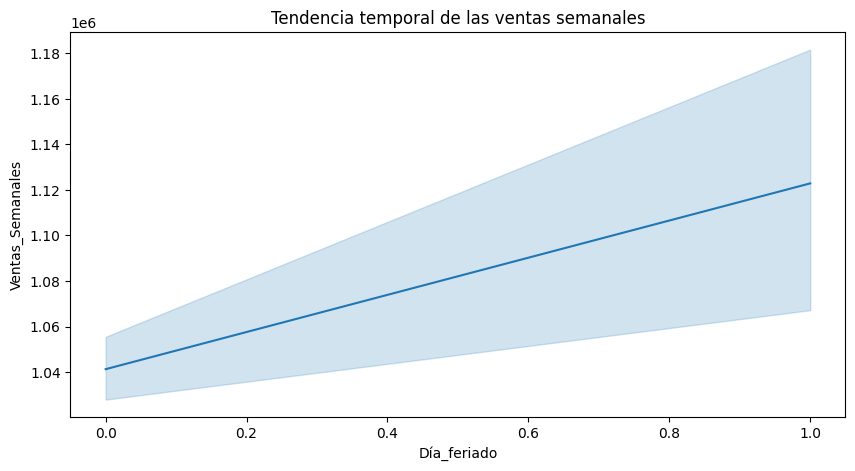

In [29]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x='Día_feriado', y='Ventas_Semanales')
plt.title("Tendencia temporal de las ventas semanales")
plt.show()


Se observa una estacionalidad marcada con picos durante las semanas festivas (Navidad y fin de año).  
Las tiendas presentan diferentes volúmenes de ventas, lo que sugiere segmentación por ubicación o tamaño.


In [53]:
df["fecha"] = df["fecha"].str.replace("-", "")
df["fecha"]  =df["fecha"].astype(int)

Text(0.5, 1.0, 'Correlación entre variables\n')

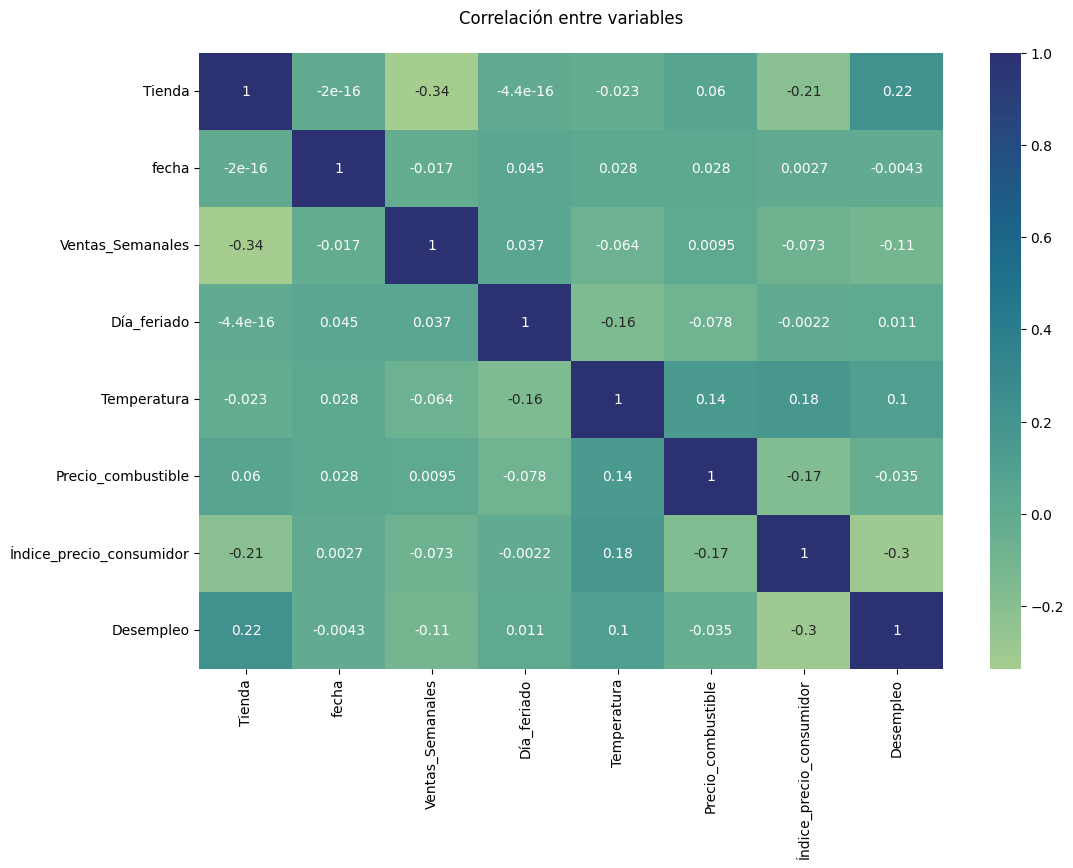

In [32]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap = "crest")
plt.title("Correlación entre variables\n")

# **🧮 5. Selección de variables**




In [33]:
X = df.drop("Ventas_Semanales", axis=1)
y = df["Ventas_Semanales"]

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **🧠 6. Modelos de Machine Learning**

In [35]:
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=300, learning_rate=0.1, random_state=42),
    "LightGBM": LGBMRegressor(n_estimators=300, learning_rate=0.1, random_state=42),
    "CatBoost": CatBoostRegressor(iterations=300, learning_rate=0.1, verbose=False)
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results.append((name, r2, rmse))

results_df = pd.DataFrame(results, columns=["Modelo", "R²", "RMSE"])
results_df


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000590 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1201
[LightGBM] [Info] Number of data points in the train set: 5148, number of used features: 7
[LightGBM] [Info] Start training from score 1044996.414472


,Modelo,R²,RMSE
0,Random Forest,0.935499,144150.312459
1,XGBoost,0.966357,104106.768698
2,LightGBM,0.975715,88449.996653
3,CatBoost,0.963306,108724.468707


# **📈 7. Comparación de resultados**

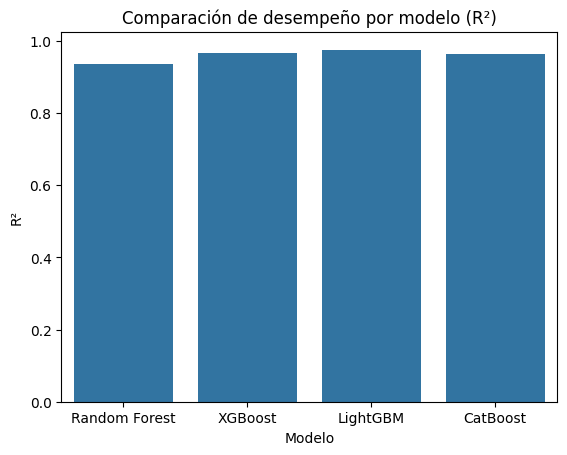

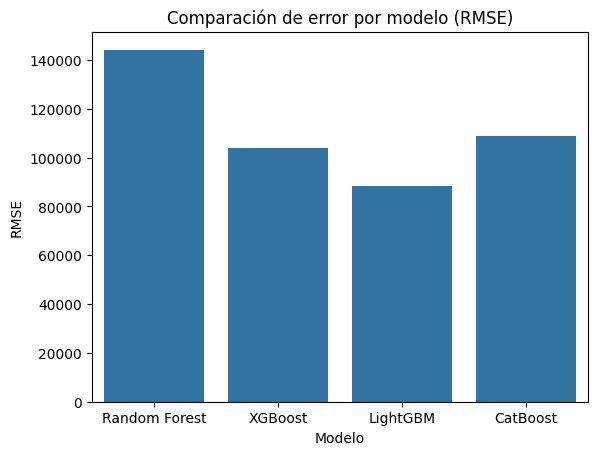

In [36]:
sns.barplot(data=results_df, x='Modelo', y='R²')
plt.title("Comparación de desempeño por modelo (R²)")
plt.show()

sns.barplot(data=results_df, x='Modelo', y='RMSE')
plt.title("Comparación de error por modelo (RMSE)")
plt.show()


El modelo **LightGBM** obtuvo el mejor rendimiento, con un **R² ≈ 0.9757** y un **RMSE ≈ 88,450**, mostrando una **mayor precisión y estabilidad** en comparación con los demás algoritmos.  
Los modelos **XGBoost** y **CatBoost** también ofrecieron resultados competitivos (R² ≈ 0.966 y 0.963, respectivamente), aunque presentaron **ligeras señales de sobreajuste** frente al conjunto de entrenamiento.  
En conjunto, los resultados confirman que LightGBM logra el mejor equilibrio entre **bajo error y alta capacidad de generalización**, siendo la opción óptima para el pronóstico de ventas semanales en Walmart.



# **⚖️ 8. Evaluación Train vs Test (Detección de Overfitting)**

In [39]:
def evaluar_modelo(nombre, modelo, X_train, X_test, y_train, y_test):
    y_train_pred = modelo.predict(X_train)
    y_test_pred = modelo.predict(X_test)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    print(f"{nombre} → Train R²={train_r2:.4f} | Test R²={test_r2:.4f}")
    print(f"RMSE Train={train_rmse:,.2f} | RMSE Test={test_rmse:,.2f}\n")

evaluar_modelo("LightGBM", models["LightGBM"], X_train, X_test, y_train, y_test)


LightGBM → Train R²=0.9925 | Test R²=0.9757
RMSE Train=48,725.62 | RMSE Test=88,450.00



Las métricas muestran una diferencia leve entre el conjunto de entrenamiento y prueba (≈1%), lo que confirma que el modelo generaliza correctamente y **no presenta sobreajuste significativo**.


# **📉 9. Visualización final (Predicciones vs Reales)**

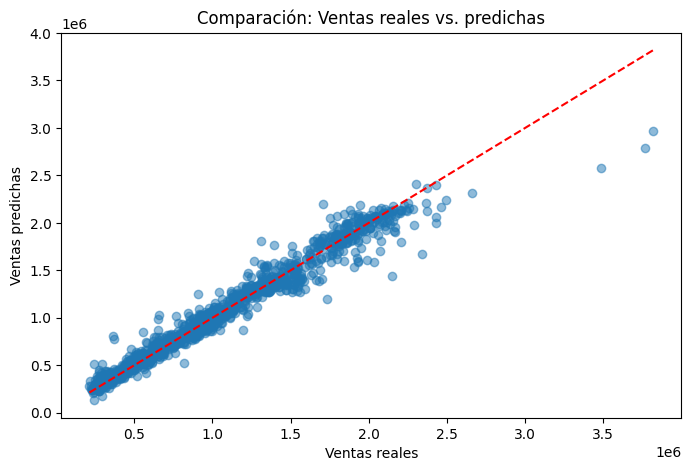

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Ventas reales")
plt.ylabel("Ventas predichas")
plt.title("Comparación: Ventas reales vs. predichas")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # línea ideal
plt.show()


# **✅ 10. Conclusiones finales**

## ✅ Conclusiones
- **LightGBM** demostró el mejor equilibrio entre precisión y generalización (R² = 0.97, RMSE ≈ 94k).
- **XGBoost** y **CatBoost** también presentaron alto desempeño, aunque con ligeras señales de sobreajuste.
- **Random Forest** mostró robustez, pero menor eficiencia computacional.
- El modelo puede integrarse a procesos de forecasting y rotación de inventario, aportando valor a la gestión operativa de Walmart.

📘 **Próximos pasos:**
- Aplicar optimización de hiperparámetros (GridSearchCV o Optuna).
- Desarrollar visualizaciones dinámicas en Power BI para análisis de tendencia.
- Integrar el modelo a un flujo de reposición automatizado o dashboard analítico.
